In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import joblib as jb
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('dataset_4.csv')
df.rename( columns=  {
    'Hours_Studied' : 'study',
    'Attendance_Rate' : 'attendance',
    'Sleep_Hours' : 'sleep',
    'Practice_Tests_Taken': 'tests',
    'Exam_Score' : 'score'
}, inplace=True)
df.head()

,study,attendance,sleep,tests,score
0,97.032686,13.046108,25.988232,52.275427,359.783657
1,59.250902,20.623611,38.951044,56.545603,252.007802
2,97.541592,20.951702,15.041476,77.966980,354.279240
3,74.333439,45.121093,23.046031,59.607276,211.949902
4,72.795594,48.980813,28.805886,64.853464,220.190154


In [3]:
x = df[['study', 'attendance', 'sleep', 'tests']].values.reshape(-1,4)
y = df['score'].values.reshape(-1,1)

sc = MinMaxScaler()
x_norm = sc.fit_transform(x)
jb.dump(sc, 'scaler_4.pkl')
yn = y.min()
yx = y.max()
y = (y-yn)/(yx - yn)

In [4]:
def score(study, attendance, sleep, tests) :
    model_path = 'four.keras'
    sc = jb.load('scaler_4.pkl')
    inp = np.array([[study, attendance, sleep, tests]])
    inp = sc.transform(inp)
    if (os.path.exists(model_path)):
        model = keras.models.load_model(model_path)
    else:
        model = keras.Sequential([keras.layers.Dense(32, input_shape=(4,), activation='relu'),
                                  keras.layers.Dense(16, activation='relu'),
                                  keras.layers.Dense(units=1)])
        model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')
        hist = model.fit(x_norm, y, epochs=500)
        lv = hist.history['loss']
        pred = model.predict(x)
        model.save('four.keras')
        plt.figure()
        plt.plot(lv)
        plt.title('loss values')
        plt.xlabel('epochs')
        plt.ylabel('loss')
        plt.grid(True)
        plt.show()

        plt.figure()
        plt.scatter(y, pred, label='actual vs predicted', color='pink')
        plt.title('Actual vs Predicted')
        plt.grid(True)
        plt.xlabel('actual')
        plt.ylabel('predicted')
        plt.legend()
        plt.show()
    return model.predict(inp)[0][0]*(yx-yn)+yn

c:\Users\user\Anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.6395
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.5427
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.4730
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.4149
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.3598
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.3132
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2866
Epoch 8/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2756
Epoch 9/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2403
Epoch 10/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2140
Epoch 11/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1983
Epoch 12/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1946
Epoch 13/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1724
Epoch 14/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1722
Epoch 15/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1517
Epoch 16/500
4/4 ━━

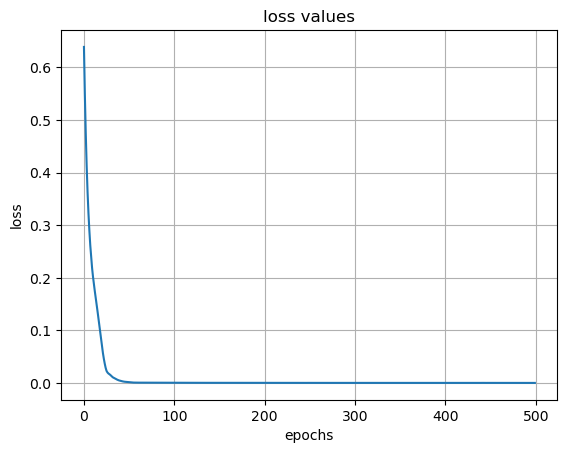

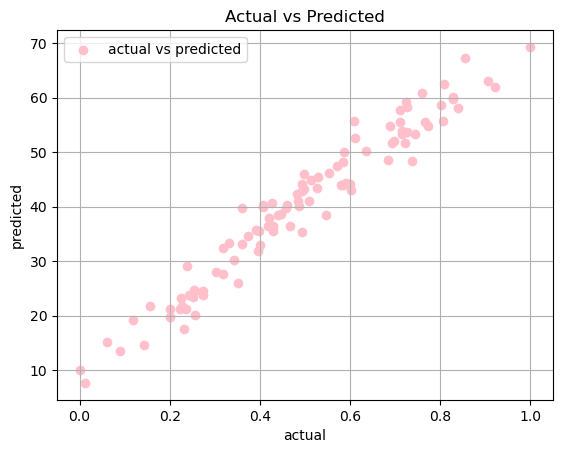

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
223.0951761399824
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
55.546295690670945
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
283.9969778664795


In [6]:
print(score(56.32, 26.89, 36.49, 82.05))
print(score(27.23, 41.69, 24.19, 36.10))
print(score(75.93, 27.85, 28.10, 80.27))